# Homework 1 : Batch Gradient Descent, Cost Optimization

## The Problem
Implement a linear regression algorithm as a gradient descent optimization that will measure how statistically dependent two variables are and apply the algorithm on the test datasets.

- The test dataset is historical fishery harvest and effort data for three groups of stakeholders
    1. Dipnet Fishermen
    2. Driftnet Fishermen
    3. Setnet Fishermen
- Data recorded on annual basis for last 15 - 30 years.
- Free variable : days fished (or permits issued)
- How correlated (or dependent) the harvest is on the fishermen's effort.

## The Procedure
- Implement regression model as cost optimization algorithm that uses batch gradient descent 
- The regression model should test function of batch size on model convergence
- Show error loss function (Y axis) over time (X axis) as function of tested batch size and number of training epochs
- Give all resulting parametric linear correlations for each dataset



## The Big Picture
- Gradient Descent : optimization algorithm often used for finding the weights or coefficients of machine learning algorithms. It works by having the model make predictions on training data and using the error on the predicitions to update the model in such a way as to reduce error.
- The goal is to find model weights that minimize the error of the model on the training dataset

The following is pseudocode for gradient descent

$ h_b(x) = b_0 + b_1x $

```python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
    train_data = shuffle(train_data)
```

We will use the Mean Squared Error as our loss function:
ERROR = $ ((b1*X1+b0 - Y1)^2 + (b1*X2+b0 - Y2)^2 + (b1*X3+b0 - Y3)^2) / 3 $


## After fitting the data
- Use R squared for goodness of fit
- R-squared: Percentage of response variation explain by linear model


# _Let's get started..._

***

## Part 1: Examine the data
The first step is to read the csv files, format the datasets as DataFrame objects, and examine the plots with regression lines based on default b0 and b1 weights.
Regression is a statistical model representing the relationship between two or more variables.

For linear regression, assumptions that will have to be made beforehand include:
- The data is uniformly distributed
- Hypothesis on free variable is within range
- N measurements > parameters
- Free variable is continuous

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

batch_sizes = [1,5,10,15,20]

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")
drift_df = pd.read_csv("drift-har-eff.csv")
set_df = pd.read_csv("set-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]

dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)

# Config pyplot
plt.xlim(0, max(dip_X))
plt.ylim(0, max(dip_Y))

(0, 1.0)

 b0: 0.264628511654 b1: 0.542091154316 b2: 0.665307834109 Error: 14.177371132
 b0: 0.0956889000429 b1: 0.439429949012 b2: 0.591640369742 Error: 0.866151934681
 b0: 0.0555036920424 b1: 0.41737424033 b2: 0.577130766808 Error: 0.127305939565
 b0: 0.0446621286995 b1: 0.413551880038 b2: 0.575938161763 Error: 0.0778140041187
 b0: 0.0405805702032 b1: 0.413801030113 b2: 0.577657771531 Error: 0.0730881494531
 b0: 0.0381245812263 b1: 0.414909105759 b2: 0.57993265914 Error: 0.0727409431242
 b0: 0.036123062019 b1: 0.416150094097 b2: 0.582233365457 Error: 0.0730770574658
 b0: 0.0343053355134 b1: 0.417362530188 b2: 0.584445164215 Error: 0.0735412172086
 b0: 0.0326054865509 b1: 0.418512979888 b2: 0.586547218536 Error: 0.0740219124369
 b0: 0.0310043498516 b1: 0.419596908918 b2: 0.588539728059 Error: 0.0744943085812
 b0: 0.0294936090085 b1: 0.42061617817 b2: 0.590427398501 Error: 0.0749525749967
 b0: 0.0280676299562 b1: 0.421573941749 b2: 0.592215702256 Error: 0.0753952509933
 b0: 0.0267215941681 b1: 0

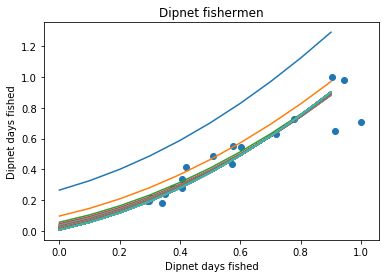

In [17]:
import matplotlib.pyplot as plt
import random

def calc_total_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 3

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b2 = 1.0
b1 = 1.0
b0 = 1.0

learn = 0.3

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), 5)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]

for i in range(100):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b2_temp_error = mse(sample_X, sample_Y, calc_b2_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    b2 = adjustWeight(b2, learn, b2_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " b2: " + str(b2) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b2*X_test**2+ b1*X_test + b0)
    plt.pause(0.1)

plt.show()